# Ford GoBike System Data Exploration
## by Lina Montrimaite

## Investigation Overview

> In this analysis, one of my goals was to identify when most trips are taken in terms of time of hour, weekday or month of the year. Second I wanted to know who the Ford GoBikes users are by age, gender and type. At last see how do the bike trips usually look by trip duration, distance and speed. 

## Dataset Overview

> The dataset recorded Ford GoBike's bike-sharing service in the greater SF Bay area. Each record is an individual ride which consists of 16 features, such as duration, ride start/end time, start and end station id/name, start/end station coordinates, bikes id, user type, member birth year, member age, gender, and bike share for all trips. For this analysis I have selectected one year period from 2018-05 until 2019-04, that contains 2,161,106 bike trips.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
from math import sin, cos, sqrt, atan2, radians
glob.glob('/pycharm/*')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
ford_gobike = pd.read_csv('fordgo_final.csv')

## Proportion of User Types

> The 1,8 mln trips and 88,7 % of the all trips are made by subscriber users. From two plots we can see that most bike users are subscribers and just small slides are random customers. Probably the local people are most likely to be subscribers and tourists are customers.

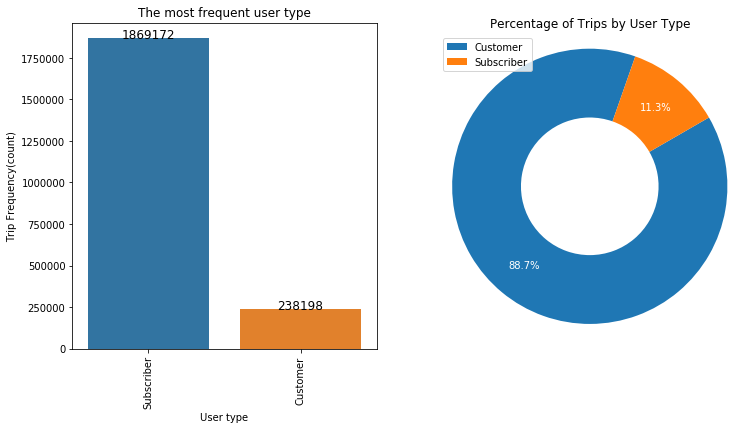

In [5]:
user_type_counts = ford_gobike['user_type'].value_counts()

plt.figure(figsize=[12, 6])

plt.subplot(1, 2, 1)
user_type_counts = ford_gobike['user_type'].value_counts()
sb.barplot(user_type_counts.index, user_type_counts)
plt.xticks(rotation=90)

for i in range (user_type_counts.shape[0]):
    count = user_type_counts[i]
    plt.text(i, count+1, count, ha = 'center', va= 'baseline', fontsize=12)

#data=ford_gobike, x='user_type', color = sb.color_palette()[2]);
plt.title('The most frequent user type')
plt.xlabel('User type')
plt.ylabel('Trip Frequency(count)')

plt.subplot(1, 2, 2)
plt.pie(user_type_counts, startangle = 30, autopct='%1.1f%%', pctdistance=0.75, labels=['Customer', 'Subscriber'], textprops={'color':'white'}, counterclock = False, wedgeprops = {'width' : 0.5});
plt.axis('square');
plt.title("Percentage of Trips by User Type")
plt.legend()
plt.show();

## Distribution of Trips by User Gender and Age 

> We can see how darkest color and clarity grades showing trip frequency by plotting the user gender and age range together. The plot clearly shows that the most of the customers are males and between 28 and 32 years old.

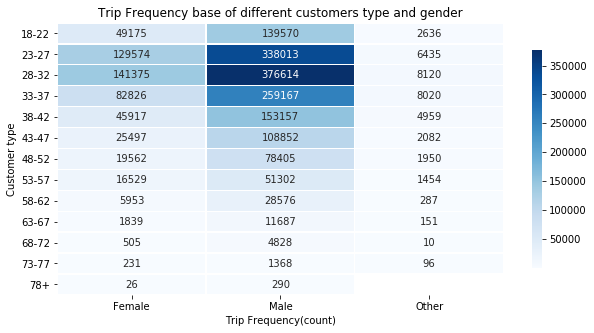

In [10]:
binsize = 5

ct_counts = ford_gobike.groupby(['age_range', 'member_gender']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'age_range', columns = 'member_gender', values = 'count')

plt.figure(figsize=[10, 5])
sb.heatmap(ct_counts, annot = True, fmt = '.0f', cmap="Blues", cbar_kws={"shrink": .8}, linewidth=0.3)
plt.title('Trip Frequency base of different customers type and gender')
plt.xlabel('Trip Frequency(count)')
plt.ylabel('Customer type')
plt.show();

## Distribution of Trip Duration, Distance and Speed by User Gender

> These three plots show trips count by customer gender and travel duration, distance and speed. It shows that females are more likely to use bikes with longer trip duration and have the lowest speed. Although the male user uses bikes for the shorter trip duration and has the highest speed.

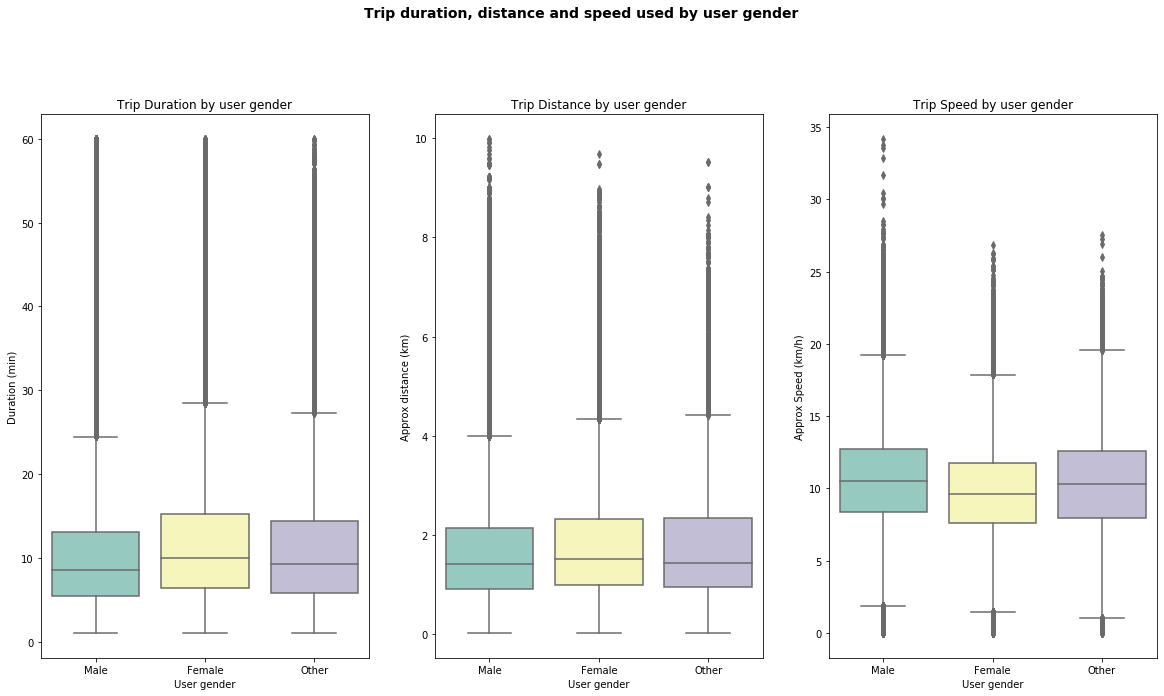

In [11]:
plt.figure(figsize = [20, 10])

# PLOT ON LEFT
plt.subplot(1, 3, 1)
sb.boxplot(data=ford_gobike[ford_gobike['duration_min']<60], x='member_gender', y='duration_min', palette="Set3" )
plt.title('Trip Duration by user gender')
plt.ylabel('Duration (min)')
plt.xlabel('User gender')

# PLOT ON CENTER
plt.subplot(1, 3, 2)
sb.boxplot(data=ford_gobike[ford_gobike['distance']<10], x='member_gender', y='distance', palette="Set3")
plt.title('Trip Distance by user gender')
plt.ylabel('Approx distance (km)')
plt.xlabel('User gender')

# PLOT ON RIGHT
plt.subplot(1, 3, 3)
sb.boxplot(data=ford_gobike[ford_gobike['speed km/h']<35], x='member_gender', y='speed km/h', palette="Set3")
plt.title('Trip Speed by user gender')
plt.ylabel('Approx Speed (km/h)')
plt.xlabel('User gender')

plt.suptitle('Trip duration, distance and speed used by user gender', y=1.03, fontsize=14, fontweight='semibold');

## Distribution of Trip by Day Hour, Weekday and Month

> From the above figure plots we can make final trip frequency distribution by time variables. So we could say that the most customers have used bikes at 8 and 17 hour, during workdays and in March and April months.

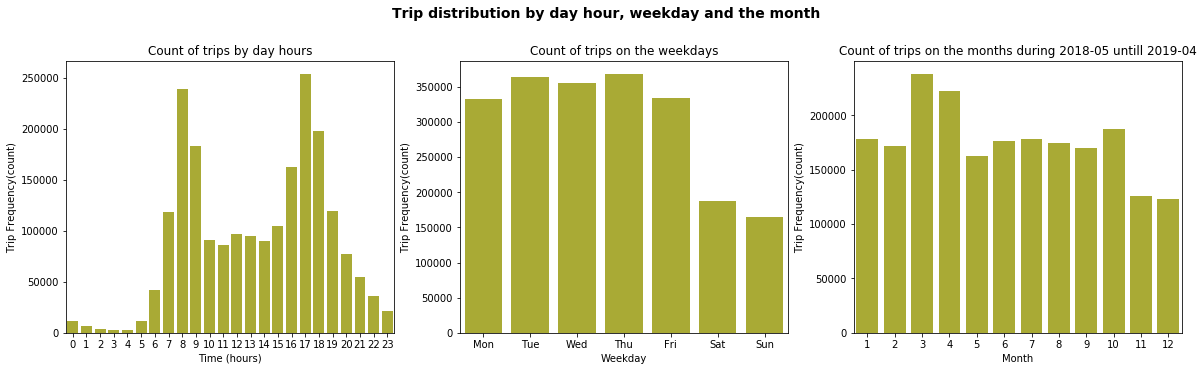

In [12]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
sb.countplot(data=ford_gobike, x='start_hour', color = sb.color_palette()[8]);
plt.title('Count of trips by day hours')
plt.xlabel('Time (hours)')
plt.ylabel('Trip Frequency(count)')

plt.subplot(1, 3, 2)
order_d = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=ford_gobike, x='start_weekday', color = sb.color_palette()[8], order = order_d);
plt.title('Count of trips on the weekdays')
plt.xlabel('Weekday')
plt.ylabel('Trip Frequency(count)')

plt.subplot(1, 3, 3)
sb.countplot(data=ford_gobike, x='start_month', color = sb.color_palette()[8]);
plt.title('Count of trips on the months during 2018-05 untill 2019-04')
plt.xlabel('Month')
plt.ylabel('Trip Frequency(count)')

plt.suptitle('Trip distribution by day hour, weekday and the month', y=1.03, fontsize=14, fontweight='semibold');
plt.show();

## Distribution of Average Trip Duration by Weekday and Month

> The distribution of average trip duration plot shows very clearly that users have longer bike trips on weekends and shorter trips on workdays. The highest average trip was 17.7 minutes in July. Also, we can mention that the average trip duration drops in winter months.

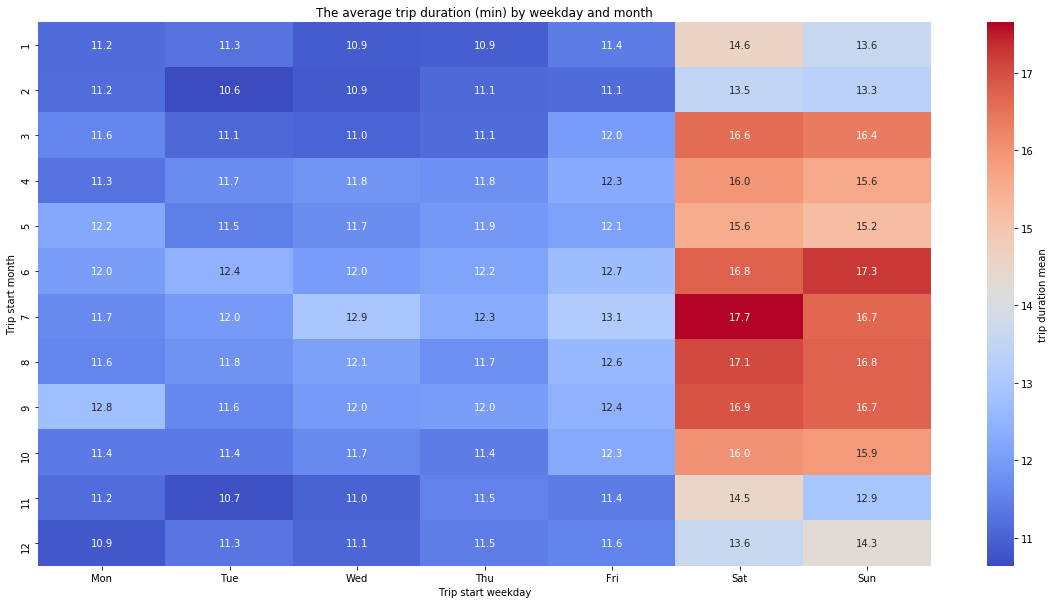

In [7]:
df_new2 = pd.DataFrame(ford_gobike.groupby(['start_weekday', 'start_month']).mean()['duration_min'])
df_new2 = df_new2.reset_index()
df_new2.start_weekday = pd.Categorical(df_new2.start_weekday, 
                                       categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                                       ordered=True)


pivot = df_new2.pivot_table(values='duration_min',index='start_month', columns='start_weekday')
plt.figure(figsize=(20,10))
sb.heatmap(pivot, annot=True, fmt='.1f', cbar_kws = {'label' : 'trip duration mean'}, cmap='coolwarm')
plt.xlabel('Trip start weekday')
plt.ylabel('Trip start month')
plt.title('The average trip duration (min) by weekday and month')
plt.show();